In [1]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Source:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

*Given below is the dataset loaded with training and test sets separately.*

#### Answer:

In [3]:
import pandas as pd

In [6]:
iris = pd.read_csv('iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
iris.shape

(152, 6)

## Data Pre-processing

## Question 2 - Missing values

*Find the number of missing values for each column. And drop all the rows having more than half missing values.*

#### Answer:

In [24]:
iris.isnull().sum()

Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64

In [148]:
iris2 = iris[iris.isnull().sum(axis=1) <=2 ]
iris2.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

## Question 3 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values.*

#### Answer:

In [21]:
iris[iris.isnull().any(axis=1)]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
150,151,5.9,NaN,NaN,NaN,Iris-virginica
151,152,NaN,NaN,NaN,1.8,Iris-virginica


In [50]:
iris.groupby(['Species']).median()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,25.5,5.0,3.4,1.50,0.2
Iris-versicolor,75.5,5.9,2.8,4.35,1.3
Iris-virginica,126.5,6.5,3.0,5.55,2.0


In [149]:
iris2 = iris.groupby(['Species']).apply(lambda x: x.fillna(x.median()))
iris2.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [150]:
iris2['Species'] = iris2.Species.astype('category')

## Question 4 - Dealing with categorical data

Change all the classes to numericals (0to2).

#### Answer:

In [151]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

iris2['Species'] = encoder.fit_transform(iris2["Species"])
iris2.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
Species                                                                       
Iris-setosa 0   1            5.1           3.5            1.4           0.2   
            1   2            4.9           3.0            1.4           0.2   
            2   3            4.7           3.2            1.3           0.2   
            3   4            4.6           3.1            1.5           0.2   
            4   5            5.0           3.6            1.4           0.2   

               Species  
Species                 
Iris-setosa 0        0  
            1        0  
            2        0  
            3        0  
            4        0

In [152]:
iris2.drop(labels = "Id", axis=1, inplace=True)
iris2.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
Species                                                                   
Iris-setosa 0            5.1           3.5            1.4           0.2   
            1            4.9           3.0            1.4           0.2   
            2            4.7           3.2            1.3           0.2   
            3            4.6           3.1            1.5           0.2   
            4            5.0           3.6            1.4           0.2   

               Species  
Species                 
Iris-setosa 0        0  
            1        0  
            2        0  
            3        0  
            4        0

## Question 5

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

#### Answer:

In [153]:
iris2[iris2.columns].corr()['Species']
#no variables have correlation in specified range hence none to drop

SepalLengthCm    0.780203
SepalWidthCm    -0.417318
PetalLengthCm    0.949609
PetalWidthCm     0.956433
Species          1.000000
Name: Species, dtype: float64

## Question 6

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

#### Answer:

In [154]:
iris2.iloc[:,:-1].var()
#no variables have variance < 0.1 hence none to drop

SepalLengthCm    0.679466
SepalWidthCm     0.185552
PetalLengthCm    3.113888
PetalWidthCm     0.581262
dtype: float64

## Visualization

## Question 7
*Plot the count of rows of each class.*

#### Answer:

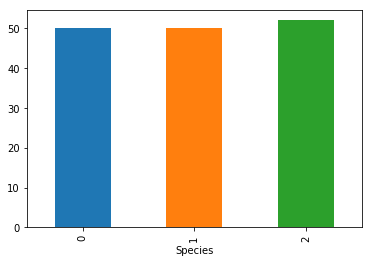

In [103]:
import matplotlib.pyplot as plt   
import matplotlib.style
ck = iris2.groupby('Species').size()
ck.plot(kind='bar')

In [104]:
iris2.groupby('Species').size()

Species
0    50
1    50
2    52
dtype: int64

## Question 8

*Plot each independent variable and see how the values are scattered.*

#### Answer:

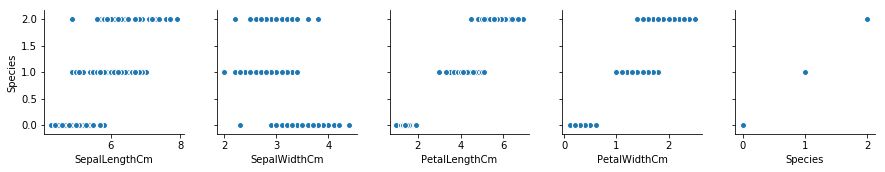

In [115]:
import seaborn as sns
sns.pairplot(data = iris2, y_vars = ['Species'], x_vars = iris2.columns)


## Question 9

*Plot the SepalLengthCm vs PetalLengthCm and SepalWidthCm vs PetalWidthCm and see how each variable is associated with another.*

#### Answer:

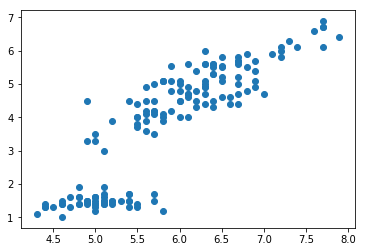

In [106]:
plt.scatter(iris2.SepalLengthCm, iris2.PetalLengthCm)

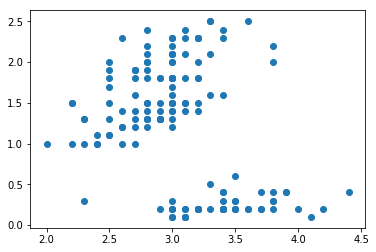

In [107]:
plt.scatter(iris2.SepalWidthCm, iris2.PetalWidthCm)

## Question 10

*Plot the scatter matrix for all the variables.*

#### Answer:

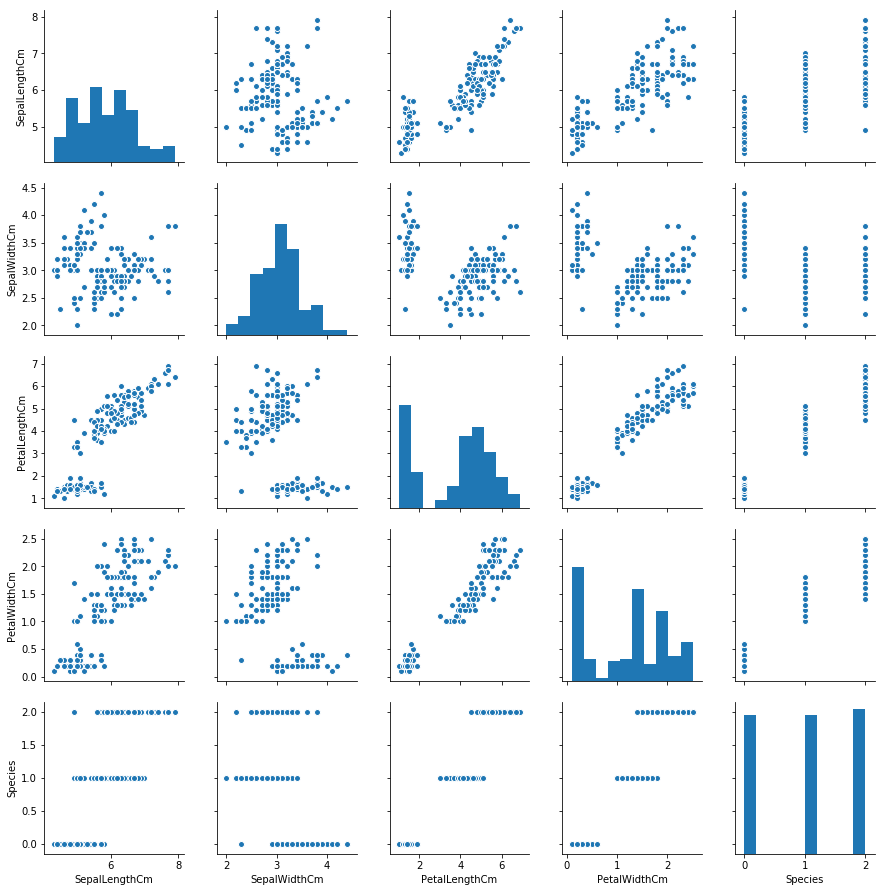

In [116]:
sns.pairplot(iris2)

## Split the dataset into training and test sets

## Question 11

*Split the dataset into training and test sets with 80-20 ratio.*

#### Answer:

In [163]:
from scipy.stats import zscore
iris_feature = iris2.drop(['Species'] , axis = 1)
iris_feature_z = iris_feature.apply(zscore)
iris_feature_z.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,1.520000e+02,1.520000e+02,1.520000e+02,1.520000e+02
mean,-7.859210e-16,-9.088125e-16,1.431603e-16,-2.490698e-16
std,1.003306e+00,1.003306e+00,1.003306e+00,1.003306e+00
min,-1.884203e+00,-2.453286e+00,-1.581889e+00,-1.457961e+00
25%,-9.104713e-01,-5.899533e-01,-1.240748e+00,-1.194766e+00
50%,-5.845594e-02,-1.241200e-01,3.512399e-01,1.212082e-01
75%,6.718429e-01,5.746298e-01,7.492370e-01,7.791954e-01
max,2.497590e+00,3.136713e+00,1.772658e+00,1.700377e+00


In [165]:
import numpy as np
iris_labels = iris2['Species']
X = np.array(iris_feature_z)
y = np.array(iris_labels)

In [166]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

## Question 12 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=5,13,21**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

#### Answer:

In [169]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


NNH = KNeighborsClassifier(n_neighbors= 5)
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [170]:
predicted_labels = NNH.predict(X_test)
print('accuracy score: ', metrics.accuracy_score(y_test, predicted_labels))

accuracy score:  1.0


In [171]:
NNH = KNeighborsClassifier(n_neighbors= 13)
NNH.fit(X_train, y_train)
predicted_labels = NNH.predict(X_test)
print('accuracy score: ', metrics.accuracy_score(y_test, predicted_labels))

accuracy score:  1.0


In [172]:
NNH = KNeighborsClassifier(n_neighbors= 21)
NNH.fit(X_train, y_train)
predicted_labels = NNH.predict(X_test)
print('accuracy score: ', metrics.accuracy_score(y_test, predicted_labels))

accuracy score:  1.0


## Question 13 -  Cross Validation

*Find the **optimal number of neighbours** using cross validation.*

**Hint: ** check **cross_val_score()** in scikit-learn

#### Answer:

In [181]:
from sklearn.model_selection import cross_val_score
NHH = KNeighborsClassifier(n_neighbors= 5)
scores = cross_val_score(NHH, X, y, cv=5)     
scores

array([0.96774194, 0.96774194, 0.9       , 0.93333333, 1.        ])

## Question 14

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

#### Answer:

In [182]:
cv_scores = []
cv_scores.append(scores.mean())

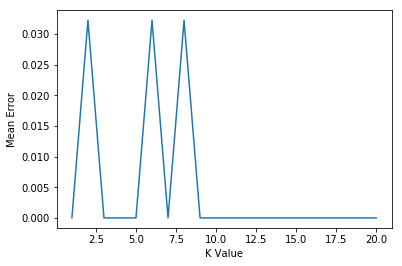

In [187]:
error = []

# Calculating error for K values between 1 and 21
for i in range(1, 21):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
plt.plot(range(1, 21), error) 
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 
plt.show()

## Question 15 - Implement KNN from scratch [Bonus]
*Implement KNN form scratch and check the accuracy with k=5 and compare with the above accuracy with scikit-learn.*

#### Answer: